# Raffi Argianda 221351112

In [1]:
import pandas as pd 
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('kalori_ganda.csv')
df.head()

,Umur,BB,TB,Olahraga,Kalori
0,25,68,175,30,2400
1,40,85,180,45,2800
2,30,70,160,60,2600
3,50,90,170,20,3000
4,35,75,165,40,2700


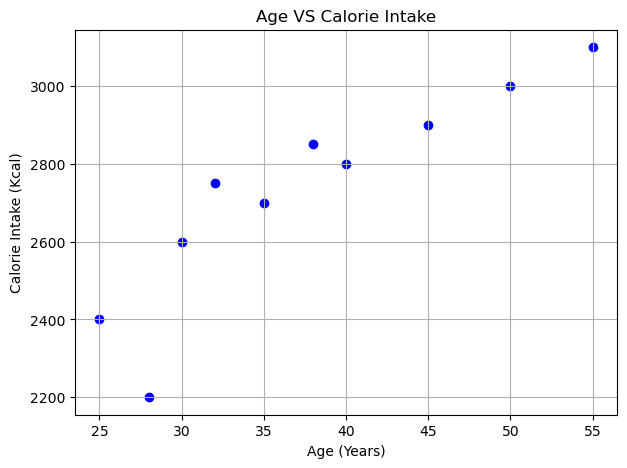

In [3]:
plt.figure(figsize=(7,5))
plt.scatter(data = df, x = 'Umur', y = 'Kalori', color = 'blue')
plt.title('Age VS Calorie Intake')
plt.xlabel('Age (Years)')
plt.ylabel('Calorie Intake (Kcal)')
plt.grid(True)
plt.show()

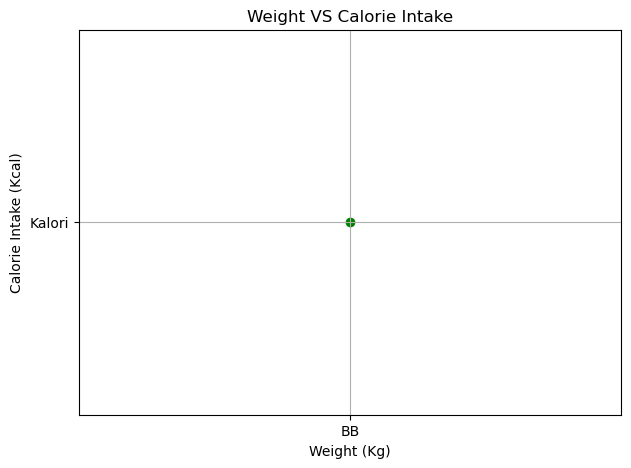

In [4]:
plt.figure(figsize=(7,5))
plt.scatter(data = 'df', x = 'BB', y = 'Kalori', color = 'green')
plt.title('Weight VS Calorie Intake')
plt.xlabel('Weight (Kg)')
plt.ylabel('Calorie Intake (Kcal)')
plt.grid(True)
plt.show()

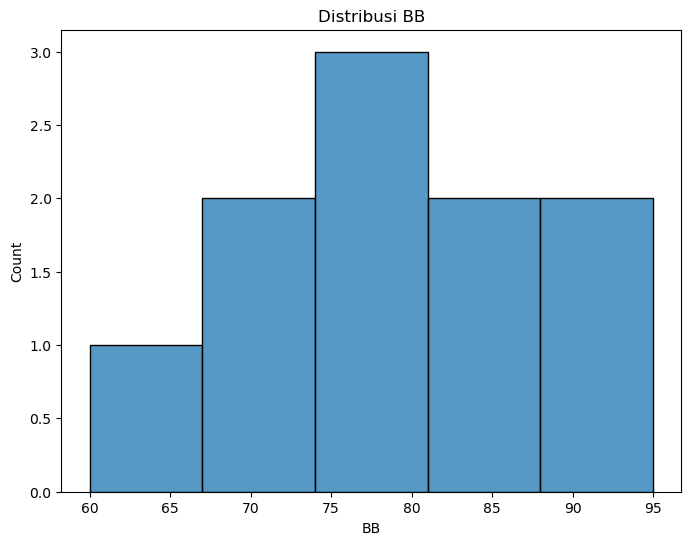

In [5]:
plt.figure(figsize=(8,6))
sns.histplot(data = df, x = 'BB')
plt.title('Distribusi BB')
plt.show()

In [6]:
fig = px.scatter_3d(df, x = 'Umur', y = 'BB', z = 'TB', color = 'Olahraga', size = 'Kalori', hover_name = 'Umur')
fig.show()

In [7]:
x = df[['Umur', 'BB', 'TB', 'Olahraga']]
y = df['Kalori']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [9]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [10]:
intercept = model.intercept_
intercept

854.3029739002131

In [11]:
coefficients = model.coef_
coefficients

array([ 3.05138649, 22.34269713,  0.0466017 ,  0.06622248])

In [12]:
manual = intercept + (25*3.05138649) + (75*22.34269713) + (170*0.0466017) + (60*0.06622248)
manual

2618.1855587002133

In [13]:
input_data = np.array([[25, 75, 170, 60]])

In [14]:
predicted_calories = model.predict(input_data)
predicted_calories

c:\Users\rapsa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([2618.18555887])

In [15]:
y_pred = model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print(f'Mean Squared Error (MSE) : {mse}')
print(f'R-squared (R2) : {r2}')

Mean Squared Error (MSE) : 4792.391825718538
R-squared (R2) : -6.66782692114966


## TEST STREAMLIT

In [18]:
import pickle

filename = 'regression_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [19]:
import streamlit as st 
st.title('Prediksi Kalori')

st.header('Masukkan Data')
umur = st.number_input('Umur', min_value=25, max_value=55)
bb = st.number_input('Berat Badan (BB)', min_value=60, max_value=95)
tb = st.number_input('Tinggi Badan (TB)', min_value=155, max_value=180)
olahraga = st.number_input('Durasi Olahraga (Menit)', min_value=20, max_value=90)

if st.button('Prediksi'):
    loaded_model = pickle.load(open('regression_model.pkl', 'rb'))
    input_data = [[umur, bb, tb, olahraga]]
    prediction = loaded_model.predict(input_data)

    st.header('Hasil Prediksi')
    st.write(f'Kalori Yang diperkirakan : {prediction[0]:.2f}')

2024-11-07 11:15:03.454 
  command:

    streamlit run c:\Users\rapsa\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
